In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,JobLevel,PerformanceRating,Total_Satisfaction_bool,Age_bool,DailyRate_bool,Department_bool,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
1448,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1140,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1283,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,1,1,0,1,0,0,0,1,0,1,0,0,1,0
414,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,0,1,0,0,0,0,1,1,0,1,0,0,0,0
641,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.8
Accuracy CV 10-Fold: 88.05
Running Time: 0:00:02.942854


In [ ]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 88.44
Accuracy CV 10-Fold: 86.88
Running Time: 0:00:00.583920


In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 89.89
Accuracy CV 10-Fold: 87.46
Running Time: 0:00:00.778037


In [ ]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 89.99
Accuracy CV 10-Fold: 84.16
Running Time: 0:00:00.351261


In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 77.55
Accuracy CV 10-Fold: 75.41
Running Time: 0:00:00.214816


In [ ]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 87.27
Accuracy CV 10-Fold: 82.9
Running Time: 0:00:00.305794


In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 88.14
Accuracy CV 10-Fold: 83.48
Running Time: 0:00:00.261328


In [ ]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 79.2
Running Time: 0:00:00.268782


In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 93.59
Accuracy CV 10-Fold: 87.27
Running Time: 0:00:03.858461


In [ ]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 86.2
Running Time: 0:00:03.645360


In [ ]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [ ]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)

In [ ]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6831522	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.6735844	total: 78ms	remaining: 38.9s
2:	learn: 0.6651457	total: 82.5ms	remaining: 27.4s
3:	learn: 0.6574402	total: 87.4ms	remaining: 21.8s
4:	learn: 0.6494912	total: 92.5ms	remaining: 18.4s
5:	learn: 0.6418990	total: 96.9ms	remaining: 16.1s
6:	learn: 0.6348707	total: 101ms	remaining: 14.4s
7:	learn: 0.6278544	total: 105ms	remaining: 13s
8:	learn: 0.6207601	total: 110ms	remaining: 12.1s
9:	learn: 0.6147784	total: 113ms	remaining: 11.2s
10:	learn: 0.6080154	total: 117ms	remaining: 10.6s
11:	learn: 0.6000016	total: 122ms	remaining: 10s
12:	learn: 0.5943718	total: 126ms	remaining: 9.59s
13:	learn: 0.5876370	total: 131ms	remaining: 9.2s
14:	learn: 0.5815775	total: 135ms	remaining: 8.86s
15:	learn: 0.5761151	total: 139ms	remaining: 8.57s
16:	learn: 0.5701874	total: 144ms	remaining: 8.31s
17:	learn: 0.5651875	total: 148ms	remaining: 8.09s
18:	learn: 0.5586247	total: 153ms	remaining: 7.87s
19:	learn: 

In [ ]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.3876634	test: 0.4118319	best: 0.4118319 (24)	total: 167ms	remaining: 6.49s
25:	learn: 0.3834568	test: 0.4083782	best: 0.4083782 (25)	total: 173ms	remaining: 6.49s
26:	learn: 0.3784865	test: 0.4044829	best: 0.4044829 (26)	total: 178ms	remaining: 6.42s
27:	learn: 0.3735268	test: 0.3998634	best: 0.3998634 (27)	total: 183ms	remaining: 6.35s
28:	learn: 0.3701661	test: 0.3970132	best: 0.3970132 (28)	total: 188ms	remaining: 6.28s
29:	learn: 0.3654956	test: 0.3954280	best: 0.3954280 (29)	total: 193ms	remaining: 6.24s
30:	learn: 0.3606647	test: 0.3908504	best: 0.3908504 (30)	total: 198ms	remaining: 6.18s
31:	learn: 0.3555969	test: 0.3883293	best: 0.3883293 (31)	total: 203ms	remaining: 6.13s
32:	learn: 0.3510276	test: 0.3840450	best: 0.3840450 (32)	total: 207ms	remaining: 6.08s
33:	learn: 0.3478897	test: 0.3817885	best: 0.3817885 (33)	total: 215ms	remaining: 6.12s
34:	learn: 0.3449981	test: 0.3796924	best: 0.3796924 (34)	total: 220m

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,100.00
9,Random Forest,100.00
10,CatBoost,96.70
8,Gradient Boosting Trees,93.59
3,KNN,89.99
2,Linear SVC,89.89
0,Logistic Regression,89.80
1,SVM,88.44
6,Stochastic Gradient Decent,88.14
5,Perceptron,87.27


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,88.05
2,Linear SVC,87.46
8,Gradient Boosting Trees,87.27
10,CatBoost,87.27
1,SVM,86.88
9,Random Forest,86.20
3,KNN,84.16
6,Stochastic Gradient Decent,83.48
5,Perceptron,82.90
7,Decision Tree,79.20


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
pred_df = pd.DataFrame(index=X_test.index)
pred_df['Attrition'] = predictions
pred_df.head()
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, predictions))

Accuracy: 89.12
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       363
           1       0.86      0.46      0.60        78

    accuracy                           0.89       441
   macro avg       0.88      0.72      0.77       441
weighted avg       0.89      0.89      0.88       441



Feature: 0, Score: -0.81888
Feature: 1, Score: 0.85154
Feature: 2, Score: -0.03253
Feature: 3, Score: -0.17055
Feature: 4, Score: 0.25534
Feature: 5, Score: 0.12006
Feature: 6, Score: 0.17071
Feature: 7, Score: -0.37543
Feature: 8, Score: -0.02247
Feature: 9, Score: -0.18756
Feature: 10, Score: -0.10069
Feature: 11, Score: -0.14196
Feature: 12, Score: -0.27073
Feature: 13, Score: 0.72355
Feature: 14, Score: 0.15575
Feature: 15, Score: -0.15563
Feature: 16, Score: -0.24770
Feature: 17, Score: 0.00948
Feature: 18, Score: 0.23834
Feature: 19, Score: -0.96166
Feature: 20, Score: 0.96178
Feature: 21, Score: 0.69987
Feature: 22, Score: -0.58888
Feature: 23, Score: -0.62972
Feature: 24, Score: 0.51885
Feature: 25, Score: 0.91312
Feature: 26, Score: -0.89533
Feature: 27, Score: 0.22504
Feature: 28, Score: -0.19258
Feature: 29, Score: 0.19070
Feature: 30, Score: -0.06826
Feature: 31, Score: -0.17255
Feature: 32, Score: -0.05043
Feature: 33, Score: -0.07890
Feature: 34, Score: -1.05373
Feature: 

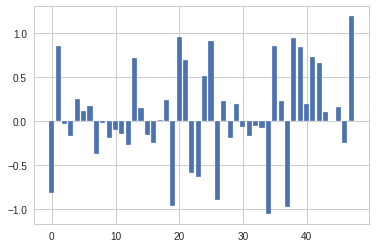

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()